# LinkedIn Job Postings (2023)

## Data Preparation & Cleansing


In [1]:
# import libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
# import dataset

job_postings = pd.read_csv('job_postings.csv')
companies = pd.read_csv('companies.csv')
company_industries = pd.read_csv('company_industries.csv')
employee_counts = pd.read_csv('employee_counts.csv')
benefits = pd.read_csv('benefits.csv')
job_skilss = pd.read_csv('job_skills.csv')

In [3]:
# drop columns we didn't use

job_postings.drop(['title', 'description', 'max_salary', 'med_salary', 'min_salary', 'pay_period', 'formatted_work_type', 
                  'location', 'original_listed_time', 'job_posting_url', 'application_url', 'expiry', 'closed_time', 
                  'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'currency', 'compensation_type'], 
                  axis = 1, inplace = True)

companies.drop(['description', 'zip_code', 'address', 'url'], axis = 1, inplace = True)
employee_counts.drop(['time_recorded'], axis = 1, inplace = True)
benefits.drop(['inferred'], axis = 1, inplace = True)

In [4]:
# merging data

merge_1 = pd.merge(job_postings, companies, on = 'company_id', how = 'inner')
merge_2 = pd.merge(merge_1, company_industries, on = 'company_id', how = 'inner')
merge_3 = pd.merge(merge_2, employee_counts, on = 'company_id', how = 'inner')
merge_4 = pd.merge(merge_3, benefits, on = 'job_id', how = 'inner')
merge_5 = pd.merge(merge_4, job_skilss, on = 'job_id', how = 'inner')

job_vacancy = merge_5.copy()

In [5]:
# check missing value

missing_value = job_vacancy.isnull().sum()

sorting_missing_value =  missing_value[missing_value > 0].sort_values(ascending = False)
sorting_missing_value

remote_allowed                9484072
applies                       5196951
views                         2308375
formatted_experience_level    2145437
company_size                     3027
dtype: int64

In [6]:
# handling missing value 

job_vacancy['remote_allowed'].fillna('Unknown', inplace = True)

cols_fill_zero = ['applies', 'views']
for col_0 in cols_fill_zero:
    job_vacancy[col_0].fillna(0, inplace = True)

cols_fill_not_specified = ['formatted_experience_level', 'company_size']
for col in cols_fill_not_specified :
    job_vacancy[col].fillna('Not Specified', inplace = True)

In [7]:
# check missing value after we handled

job_vacancy.isnull().sum()

job_id                        0
company_id                    0
applies                       0
remote_allowed                0
views                         0
application_type              0
formatted_experience_level    0
work_type                     0
name                          0
company_size                  0
state                         0
country                       0
city                          0
industry                      0
employee_count                0
follower_count                0
type                          0
skill_abr                     0
dtype: int64

In [8]:
# drop duplicates

job_vacancy.drop_duplicates(inplace=True)

In [9]:
# check duplicates

job_vacancy.duplicated().sum()

0

In [10]:
job_vacancy.rename(columns={'type':'benefits'}, inplace=True)

In [11]:
job_vacancy = job_vacancy.drop(job_vacancy[job_vacancy['city'] == '0'].index)
job_vacancy = job_vacancy.drop(job_vacancy[job_vacancy['state'] == '0'].index)

In [12]:
job_vacancy['remote_allowed'] = job_vacancy['remote_allowed'].astype('str')

job_vacancy['remote_allowed'] = job_vacancy['remote_allowed'].str.replace('1.0', 'Allowed')

C:\Users\User\AppData\Local\Temp\ipykernel_7608\3038681605.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  job_vacancy['remote_allowed'] = job_vacancy['remote_allowed'].str.replace('1.0', 'Allowed')


In [13]:
job_vacancy['state'] = job_vacancy['state'].str.replace('CA', 'California')
job_vacancy['state'] = job_vacancy['state'].str.replace('VA', 'Virginia')
job_vacancy['state'] = job_vacancy['state'].str.replace('NJ', 'New Jersey')
job_vacancy['state'] = job_vacancy['state'].str.replace('TX', 'Texas')
job_vacancy['state'] = job_vacancy['state'].str.replace('NY', 'New York')
job_vacancy['state'] = job_vacancy['state'].str.replace('IL', 'Illinois')
job_vacancy['state'] = job_vacancy['state'].str.replace('TN', 'Tennessee')

In [14]:
job_vacancy['work_type'] = job_vacancy['work_type'].str.replace('FULL_TIME', 'Full Time')
job_vacancy['work_type'] = job_vacancy['work_type'].str.replace('PART_TIME', 'Part Time')
job_vacancy['work_type'] = job_vacancy['work_type'].str.replace('CONTRACT', 'Contract')
job_vacancy['work_type'] = job_vacancy['work_type'].str.replace('TEMPORARY', 'Temporary')
job_vacancy['work_type'] = job_vacancy['work_type'].str.replace('INTERNSHIP', 'Internship')
job_vacancy['work_type'] = job_vacancy['work_type'].str.replace('OTHER', 'Other')

In [15]:
job_vacancy['application_type'] = job_vacancy['application_type'].str.replace('ComplexOnsiteApply', 'Complex Onsite Apply')
job_vacancy['application_type'] = job_vacancy['application_type'].str.replace('OffsiteApply', 'Offsite Apply')
job_vacancy['application_type'] = job_vacancy['application_type'].str.replace('SimpleOnsiteApply', 'Simple Onsite Apply')

## Visualization

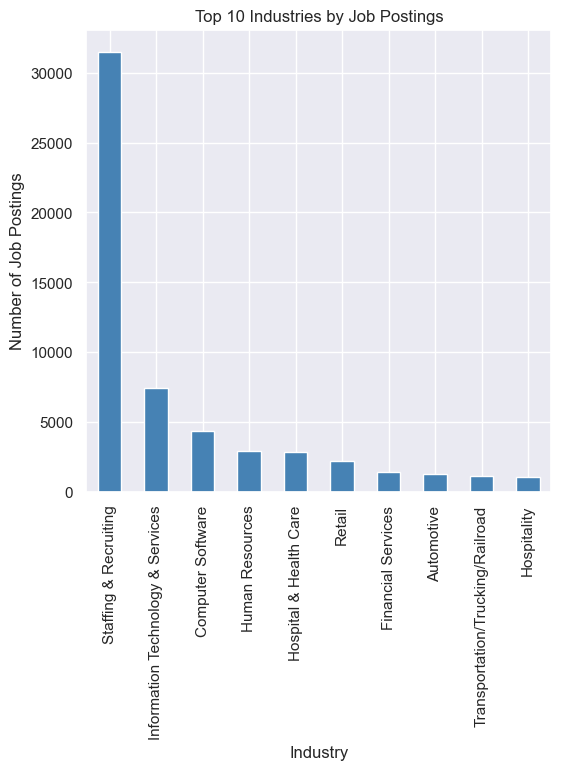

In [16]:
# Industries by Job Postings
industry_type = job_vacancy['industry'].value_counts().head(10)

plt.figure(figsize = (6,6))
industry_type.plot(kind = 'bar', color = 'steelblue')
plt.title('Top 10 Industries by Job Postings')
plt.xlabel('Industry')
plt.ylabel('Number of Job Postings')
plt.show()

The bar chart illustrates top 10 industries job postings by category industry, and the top industry with the most job postings in linkedin 2023 is staffing & recruiting, 2nd is IT & service, and 3rd is computer software.

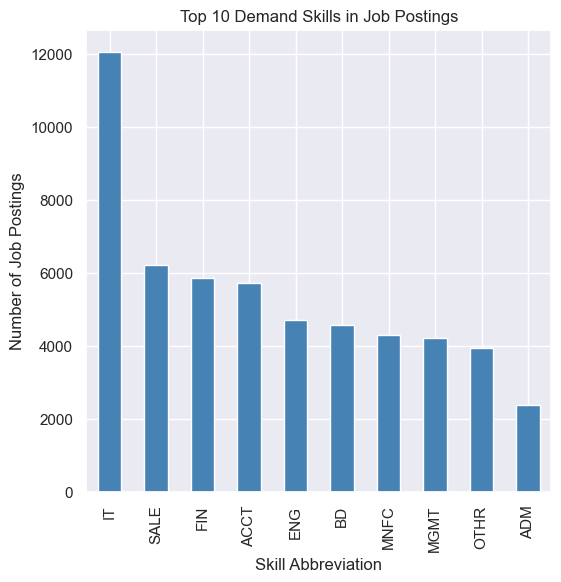

In [17]:
# Demand Skills in Job Postings
skill_type = job_vacancy['skill_abr'].value_counts().head(10)

plt.figure(figsize = (6,6))
skill_type.plot(kind = 'bar', color = 'steelblue')
plt.title('Top 10 Demand Skills in Job Postings')
plt.xlabel('Skill Abbreviation')
plt.ylabel('Number of Job Postings')

plt.show()

The most demand skills of job postings in linkedin 2023 is IT and the least is administration.

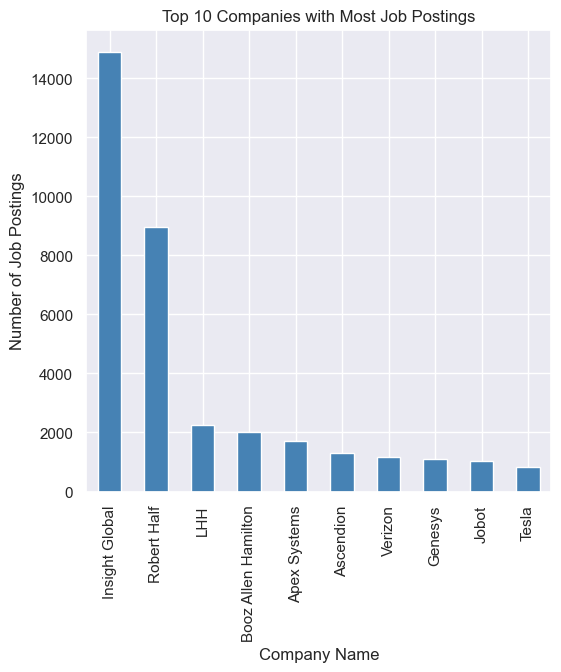

In [18]:
# Top 10 Companies with Most Job Postings 

companies_most_job_postings = job_vacancy['name'].value_counts().head(10)

plt.figure(figsize=(6,6))
companies_most_job_postings.plot(kind='bar', color='steelblue')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')

plt.show()

Insight Global is the 1st company with the most job postings. It has over 14.000 job postings. On the other hand, the 2nd place is Robert Half with almost 10.000 job postings.

- Insight Global is an international staffing and services company specialising in sourcing IT, accounting, finance, healthcare, and engineering professionals. Meanwhile, Robert Half is the largest company with a specialised talent solutions firm, connecting opportunities at great companies with highly skilled job seekers.

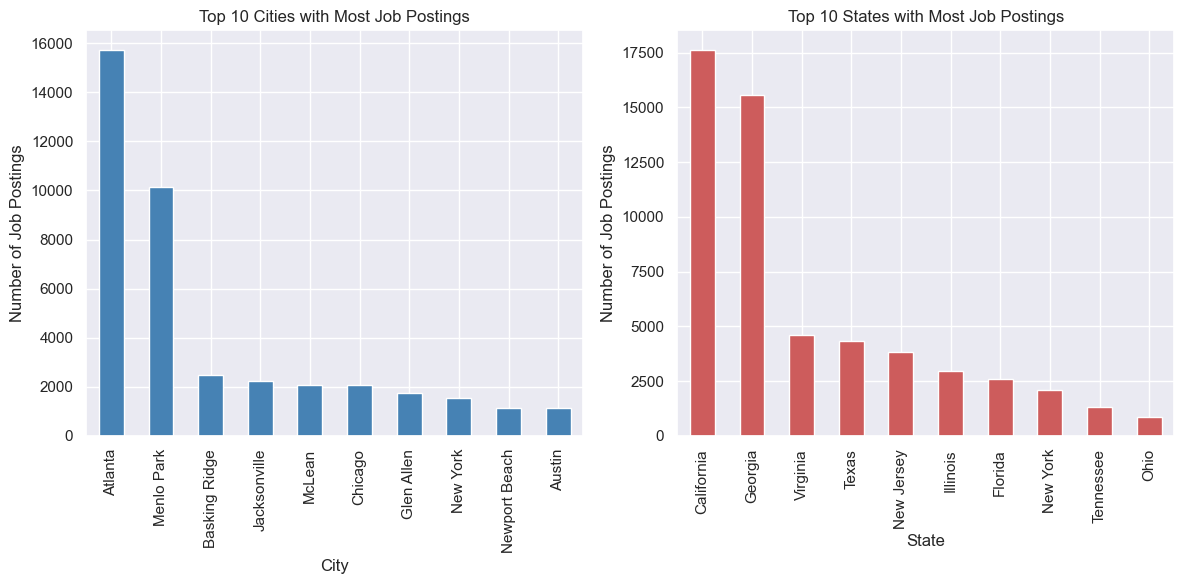

In [19]:
# Top 10 City & State with Most Job Postings

top_cities = job_vacancy['city'].value_counts().head(10)

top_states = job_vacancy['state'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

#cities
top_cities.plot(kind='bar', color='steelblue', ax=ax1)
ax1.set_title('Top 10 Cities with Most Job Postings')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Job Postings')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels())

#states
top_states.plot(kind='bar', color='indianred', ax=ax2)
ax2.set_title('Top 10 States with Most Job Postings')
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels())

plt.tight_layout()
plt.show()

The two bar charts above present the number of job postings by city and state. 

- Atlanta city leads with the highest number of job postings, followed by Menlo Park city. Atlanta is one of the cities of Georgia state, because of this Georgia state is the 2nd place for the state with the higher number of the job postings. 

- The state with the most job postings is California because Menlo Park and Newport Beach are the cities in California.

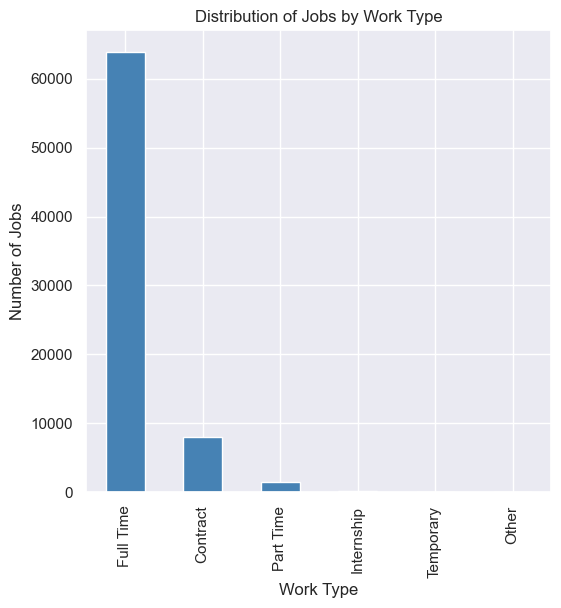

In [20]:
# Work Type of Jobs
work_type = job_vacancy['work_type'].value_counts()

plt.figure(figsize = (6,6))
work_type.plot(kind = 'bar', color = 'steelblue')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')

plt.show()

Full time positions dominate the job postings, contract and part time positions are considerably less common. Internship and temporary positions are even less frequent.

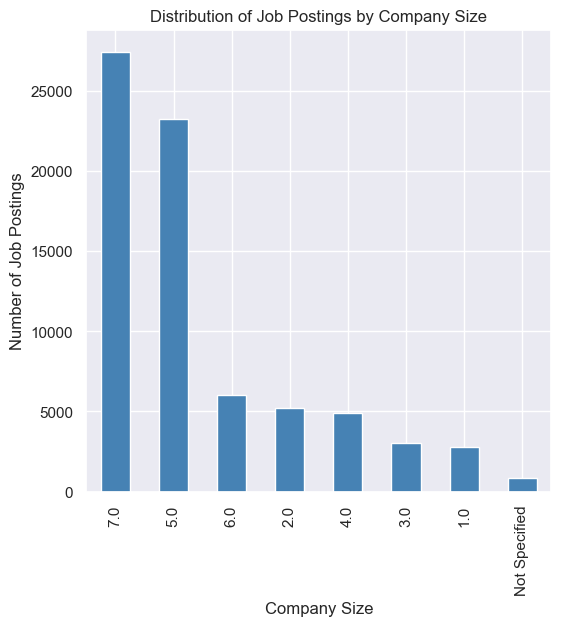

In [21]:
# Distribution of Job Postings by Company Size
company_size_type = job_vacancy['company_size'].value_counts()

plt.figure(figsize = (6,6))
company_size_type.plot(kind = 'bar', color = 'steelblue')
plt.title('Distribution of Job Postings by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Postings')

plt.show()

Number of Job postings dominate by medium to large companies.

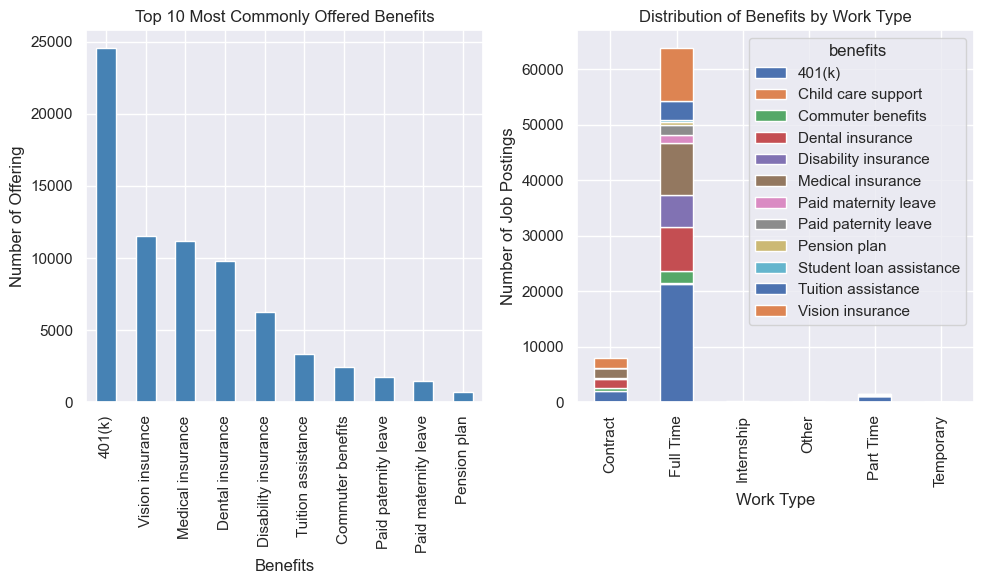

In [22]:
benefits =  job_vacancy['benefits'].value_counts().head(10)

benefits_by_work_type = job_vacancy.groupby(['work_type', 'benefits']).size().unstack()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

# Most Commonly Offered Benefits
benefits.plot(kind='bar', color='steelblue', ax=ax1)
ax1.set_title('Top 10 Most Commonly Offered Benefits')
ax1.set_xlabel('Benefits')
ax1.set_ylabel('Number of Offering')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels())

# Distribution of Benefits by Work Type
benefits_by_work_type.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Distribution of Benefits by Work Type')
ax2.set_xlabel('Work Type')
ax2.set_ylabel('Number of Job Postings')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels())

plt.tight_layout()
plt.show()


- Bar Chart : Benefit with the most offer in job postings linkedin 2023 is 401(k), followed by vision insurance and medical insurance. 

- Stacked Bar Chart : Full time position has various benefits than the other positions. Part time just only has tuition assistance as a benefit. 

Full time and contract positions both have benefits :  401(k), dental insurance, medical insurance, child care support, and commuter benefits. 

401(k)s offer workers a lot of benefits, including tax breaks, employer matches, high contribution limits, contribution potential at an older age, and shelter from creditors.

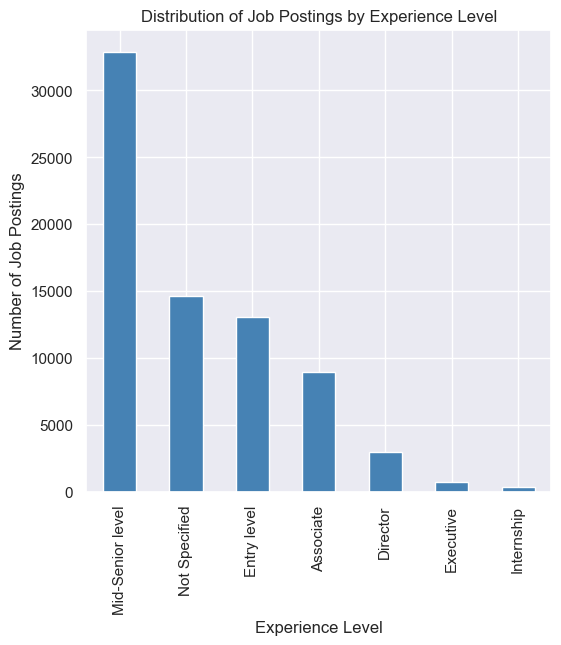

In [23]:
# Distribution of Job POstings by Experience Level 
distribution_experience_level = job_vacancy['formatted_experience_level'].value_counts().head(10)

plt.figure(figsize = (6,6))
distribution_experience_level.plot(kind='bar', color='steelblue')
plt.title('Distribution of Job Postings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')

plt.show()

The bar chart shows the distribution of job postings by experience level. Mid-Senior Level job postings dominate the dataset, followed by Entry Level and Associate roles.

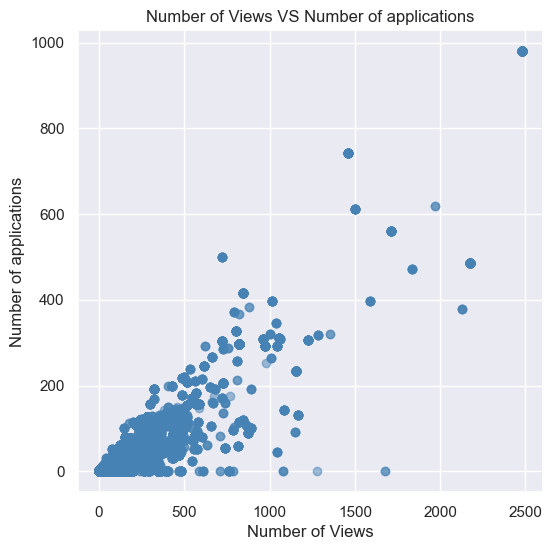

0.9085276825959832

In [24]:
# Number of Views VS Number of applications

plt.figure(figsize = (6, 6))
plt.scatter(job_vacancy['views'], job_vacancy['applies'], alpha = 0.5, color = 'steelblue')
plt.title('Number of Views VS Number of applications')
plt.xlabel('Number of Views')
plt.ylabel('Number of applications')

correlation_1 = job_vacancy['views'].corr(job_vacancy['applies'])

plt.show()
correlation_1

The scatter plot displays a positive correlation between number of views and number of applications. The correlation value is approximately 0.908 indicating a strong positive relationship between the two variables. It means that jobs that are viewed more often are also more likely to receive a higher number of applications.

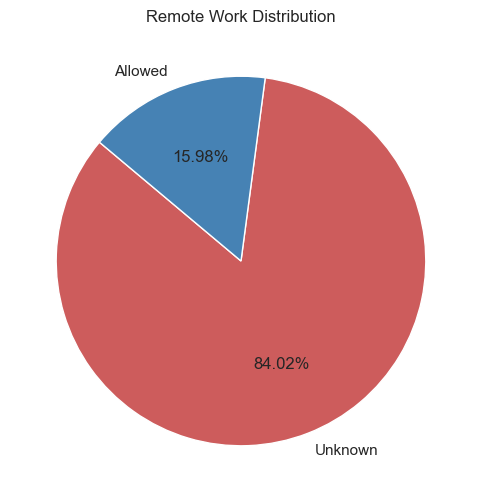

In [25]:
# Remote Work Distribution 
remote_work = job_vacancy['remote_allowed'].value_counts()

plt.figure(figsize=(6,6))
remote_work.plot(kind='pie', autopct='%1.2f%%', startangle=140, colors=['indianred', 'steelblue',])
plt.title('Remote Work Distribution')
plt.ylabel('')
plt.show()

As we can see from the pie chart about 15.98% of the postings allow for remote work, indicating flexibility in work location and about 84.02% of the postings it's not specified whether remote work is allowed or not (unknown).

## Conclusion

 
Based on the results of analysis from job postings in linkedin 2023, the industry with the highest number of job postings is the outsourcing industry. The most demanded skill is IT. Full time position and mid-senior level dominate the job postings. Companies that have lots of job vacancies are medium to large companies. However only 15,98 % of companies allow their employees to work from anywhere (remote) and others are unknown. Benefits frequently offered are 401(k), dental insurance, medical insurance, and child care support. Atlanta city leads with the highest number of job postings and California for state. Two cities in California with a lot of job vacancies are Menlo Park and Newport. There is a strong positive relationship between views and application. It means that jobs that are viewed more often are also more likely to receive a higher number of applications.